# Installing ECUBEVIS and dependencies

In [ ]:
!pip install ecubevis

In [32]:
# to solve the problem with cartopy killing the notebook kernel

!pip install shapely --upgrade --force-reinstall --no-binary shapely

  Using cached Shapely-1.8.0.tar.gz (278 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [33]:
%load_ext autoreload
%autoreload 2
        
%matplotlib inline
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import xarray as xr
import numpy as np

# Loading sample data

In [35]:
airt = xr.tutorial.open_dataset('air_temperature')

In [36]:
eraint = xr.tutorial.open_dataset('eraint_uvz')

In [37]:
ndarray5d = np.concatenate((np.expand_dims(eraint.z.values, -1), 
                            np.expand_dims(eraint.u.values, -1), 
                            np.expand_dims(eraint.v.values, -1)), axis=-1)

You can a first look at your data uwing xarray, through its wrapper around the matplotlib library, or using hvplot for interactive visualization. Whether you want to avoid learning a new package sintax, writing more lines of code, or have your plots in a quick but standardized way, ECUBEVIS is the tool for you. Let's import `ecubevis`:

In [38]:
import ecubevis as ecv

`ecv.set_interactive()` can be used to control the global variable `interactive_session`, which would control whether the plots are interactive or non-interactive for the given session. Another way to control this, is through the argument `interactive`, which has precedence over the global variable `interactive_session`. `ecv.set_interactive(True)` is set to True by default.

# Xarray objects

In [40]:
ecv.plot(eraint, 'u', cmap='RdBu', wanted_projection=ecv.crs.PlateCarree(), coastline=True, global_extent=False, plot_size_px=800)

Output hidden; open in https://colab.research.google.com to view.

In [39]:
ecv.plot(airt, 'air', coastline=True)

Output hidden; open in https://colab.research.google.com to view.

Slicing over lat and lon:

In [46]:
ecv.plot(eraint, 'z', cmap='RdBu_r', wanted_projection=ecv.crs.PlateCarree(), show_colorbar=True,
         coastline=True, global_extent=False,
         slice_lat=(30, 70), slice_lon=(-14, 40), slice_time=None, slice_level=None)

Output hidden; open in https://colab.research.google.com to view.

# Numpy objects

Interactive plot of a 5D np.ndarray. Very handy for ML workflows dealing with  multi-dimensional arrays without metadata.

In [42]:
ecv.plot(ndarray5d, cmap=ecv.cm.Blues_r, show_colorbar=True)

Output hidden; open in https://colab.research.google.com to view.

Composing plots with thanks to holoviews functionality:

In [43]:
ecv.plot(eraint.v.values, cmap='Blues_r') + ecv.plot(eraint.u.values, cmap='RdBu_r')

Output hidden; open in https://colab.research.google.com to view.

# Static plots (interactive=False)

Plotting a 4d xr.DataArray:

Variable name: u, U component of wind
Units: m s**-1
Dimensionality: 4D
Shape: (2, 3, 241, 480)
Assuming <cartopy.crs.PlateCarree object at 0x7f4bc170ead0> projection


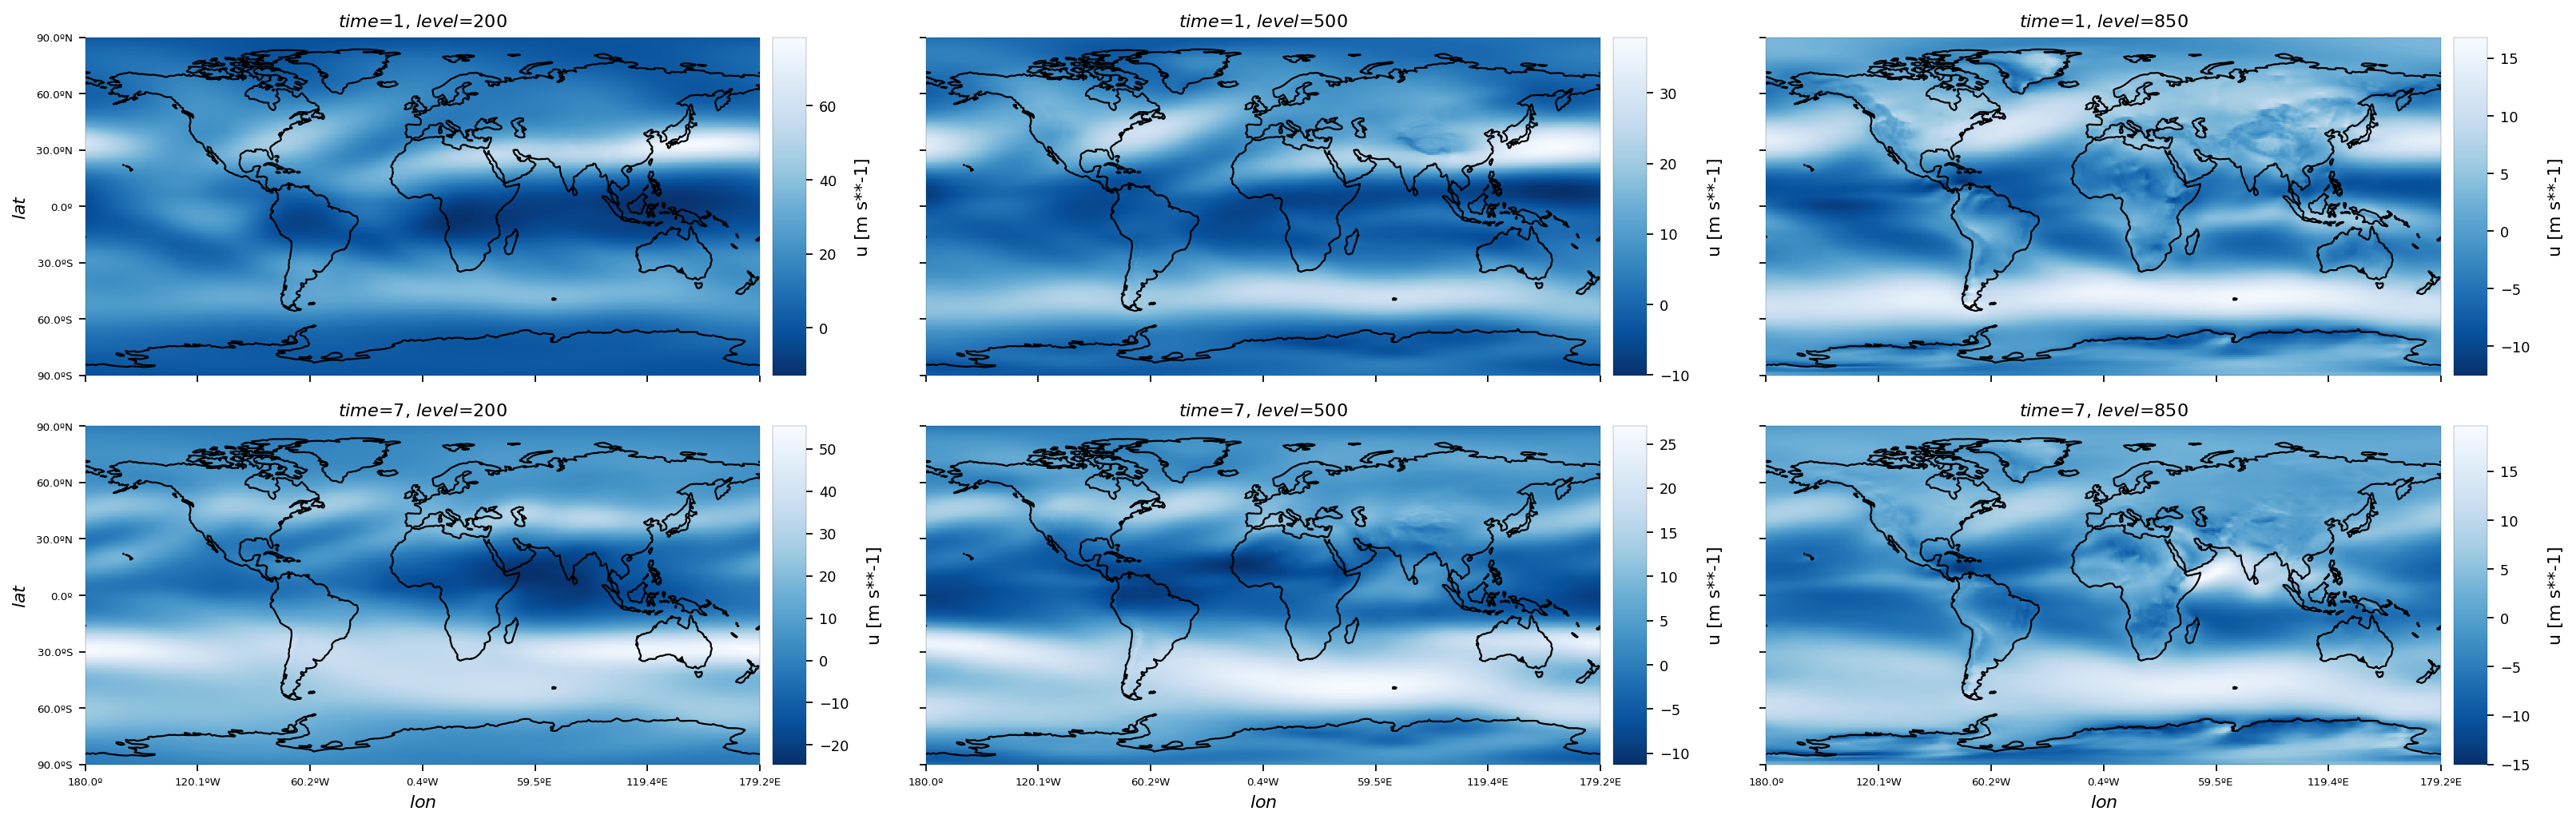

In [44]:
ecv.plot(eraint.u, interactive=False, cmap='Blues_r', wanted_projection=None, 
         show_colorbar=True, coastline=True, max_static_subplot_rows=3)

Plotting a 3d np.ndarray:

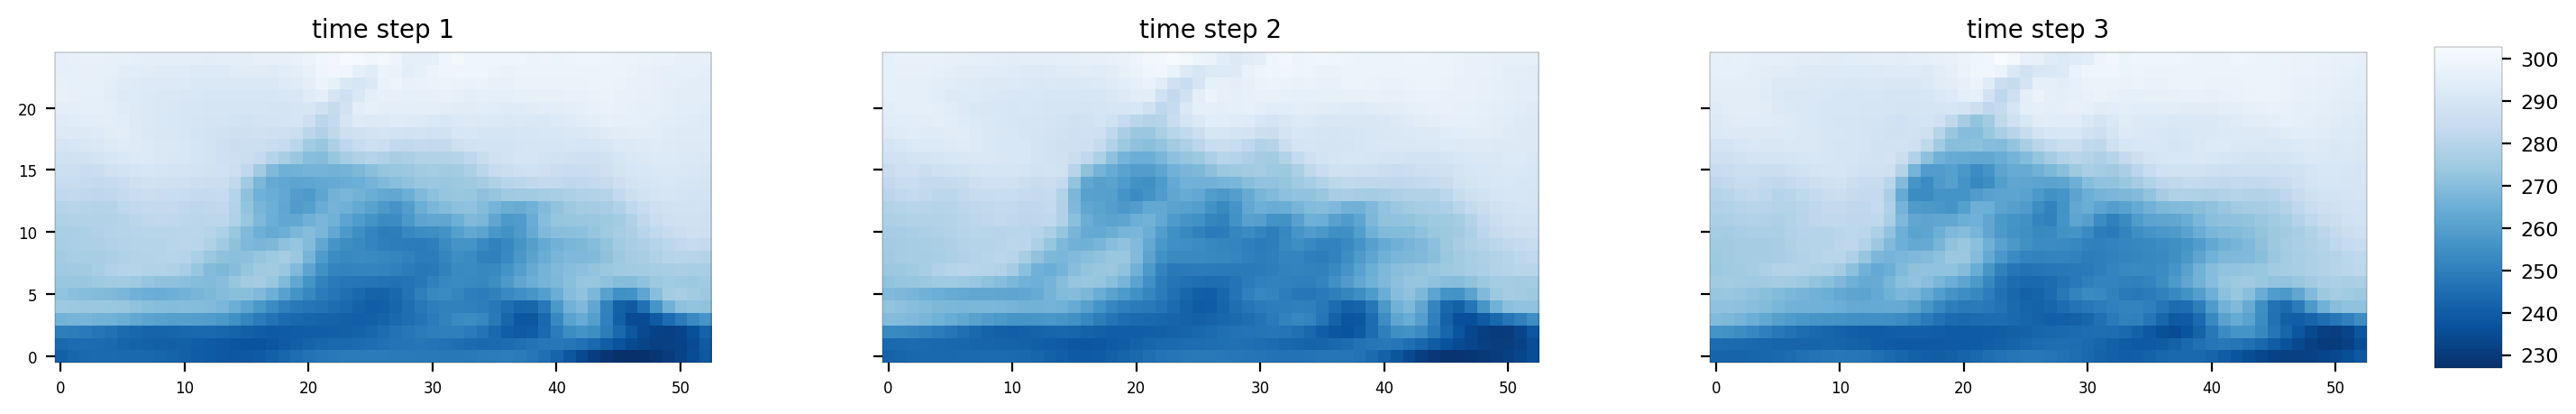

In [45]:
ecv.plot(airt.air.values, interactive=False, cmap=ecv.cm.Blues_r, show_colorbar=True, share_colorbar=True, share_dynamic_range=True,
         max_static_subplot_rows=3, subplot_titles=('time step 1', 'time step 2', 'time step 3'), dpi=100)

Plotting tuples of 2d np.ndarrays:

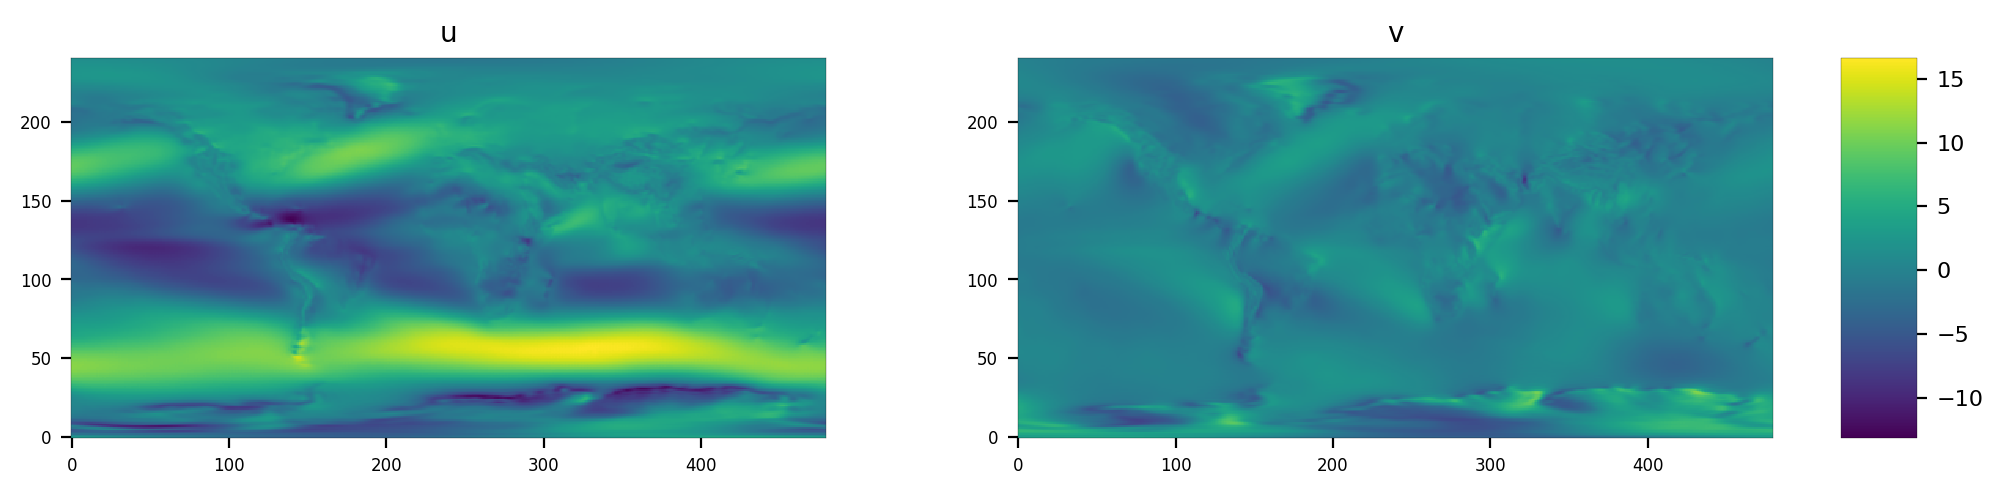

In [30]:
grid1 = np.flipud(eraint.u.sel(level=850).mean(axis=0))
grid2 = np.flipud(eraint.v.sel(level=850).mean(axis=0))

ecv.plot((grid1, grid2), interactive=False, show_colorbar=True, share_colorbar=True, share_dynamic_range=True,
         coastline=True, subplot_titles=('u', 'v'), verbose=False)